## Online news article data- I

In [1]:
import pandas as pd

Dataset1 = pd.read_csv('BBC News Train.csv')
Dataset1

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [2]:
Dataset1['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

* Five classes in output category.....

## Data Pre-processing: 

In [3]:
del Dataset1['ArticleId']

In [4]:
Dataset1.isnull().values.sum()

0

In [5]:
print("rows shape - duplicates found")
(Dataset1[Dataset1.duplicated()]).shape[0]

rows shape - duplicates found


50

In [6]:
Dataset1 =Dataset1.drop_duplicates()
Dataset1

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


In [8]:
## """NLP process"""
import nltk 
nltk.download('stopwords')

import regex as re
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer as stemmer
stemmer = stemmer()

def Research(ONA):
    ONA = ONA.lower()
    ONA = re.sub("[^a-z]+", " ", ONA)
    ONA = " ".join([A for A in ONA.split() if A not in stopwords])
    ONA=' '.join([stemmer.stem(A) for A in ONA.split()])
    return ONA

text=[]
for c in Dataset1['Text']:
    text.append(Research(c))
Dataset1['Text']=text
Dataset1

[nltk_data] Downloading package stopwords to C:\Users\Ujjwal
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Ujjwal Joshi\AppData\Local\Temp\ipykernel_7608\3363933196.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1['Text']=text


,Text,Category
0,worldcom ex boss launch defenc lawyer defend f...,business
1,german busi confid slide german busi confid fe...,business
2,bbc poll indic econom gloom citizen major nati...,business
3,lifestyl govern mobil choic faster better funk...,tech
4,enron boss payout eighteen former enron direct...,business
...,...,...
1485,doubl evict big brother model capric holbi cit...,entertainment
1486,dj doubl act revamp chart show dj duo jk joel ...,entertainment
1487,weak dollar hit reuter revenu media group reut...,business
1488,appl ipod famili expand market appl expand ipo...,tech


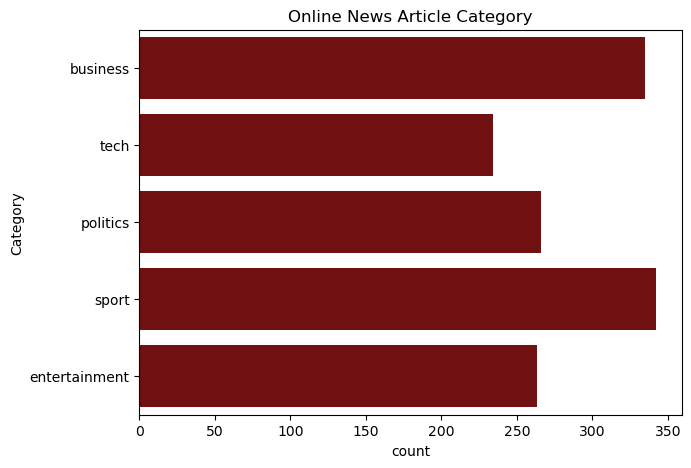

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

sns.countplot(y ='Category', data = Dataset1, color='maroon')
plt.title("Online News Article Category")
plt.show()

* Sport category having high count of news.

In [14]:
Dataset1.to_csv('Dataset1.csv', index=False)
Dataset1.shape

(1440, 2)

## Online news article data- II

In [16]:
Dataset2 = pd.read_csv('news-article-categories.csv')
Dataset2

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...
...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...
6873,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske..."
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ..."


In [17]:
Dataset2['category'].value_counts()

category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64

* Fourteen classes in output category.....

##  Data Pre-processing: 

In [18]:
del Dataset2['title']

In [19]:
Dataset2.isnull().values.sum()

5

In [20]:
Dataset2=Dataset2.dropna()

In [21]:
print("rows shape - duplicates found")
(Dataset2[Dataset2.duplicated()]).shape[0]

rows shape - duplicates found


57

In [22]:
Dataset2 = Dataset2.drop_duplicates()
Dataset2

,category,body
0,ARTS & CULTURE,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,There’s something about combining the traditio...
...,...,...
6872,WOMEN,I still think about that Tuesday night dinner ...
6873,WOMEN,I remember the morning of my high school gradu...
6874,WOMEN,"My husband, Gene, doesn't wear pajamas. I aske..."
6875,WOMEN,"\nBy AntonioGuillem, via ThinkStock\nBy Lisa ..."


In [25]:
## """NLP process"""

def Research(ONA):
    ONA = ONA.lower()
    ONA = re.sub("[^a-z]+", " ", ONA)
    ONA = " ".join([A for A in ONA.split() if A not in stopwords])
    ONA=' '.join([stemmer.stem(A) for A in ONA.split()])
    return ONA

text2=[]
for c in Dataset2['body']:
    text2.append(Research(c))
Dataset2['body']=text2
Dataset2

,category,body
0,ARTS & CULTURE,octob carolyn kramer receiv disturb phone call...
1,ARTS & CULTURE,week talk actor jeff hiller hit broadway play ...
2,ARTS & CULTURE,new yorker take presid donald trump ask u woul...
3,ARTS & CULTURE,kellen hickey year old live hudson wisconsin g...
4,ARTS & CULTURE,someth combin tradit uptight look renaiss peri...
...,...,...
6872,WOMEN,still think tuesday night dinner year old daug...
6873,WOMEN,rememb morn high school graduat clearli put wh...
6874,WOMEN,husband gene wear pajama ask told never pajama...
6875,WOMEN,antonioguillem via thinkstock lisa donoghu lin...


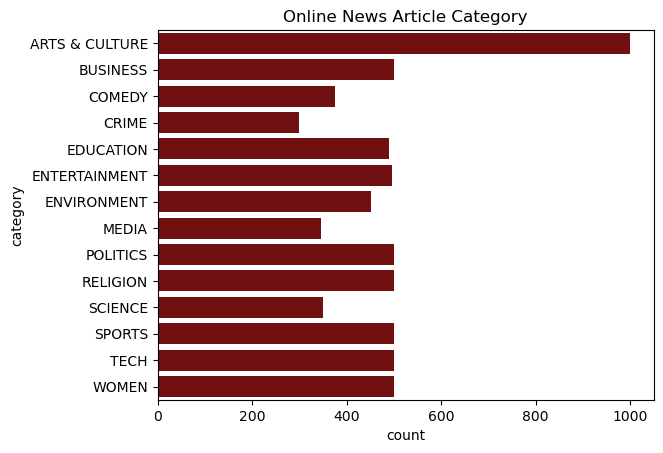

In [26]:
sns.countplot(y ='category', data = Dataset2, color='maroon')
plt.title("Online News Article Category")
plt.show()

* Art & Culture category having high count of news.

In [27]:
Dataset2.to_csv('Dataset2.csv', index=False)
Dataset2.shape

(6815, 2)

## Online news article data- III

In [30]:
A = pd.read_csv('train.csv')
B = pd.read_csv('test.csv')

Dataset3 = pd.concat([A,B])
Dataset3

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [31]:
Dataset3['Class Index'].value_counts()

Class Index
3    31900
4    31900
2    31900
1    31900
Name: count, dtype: int64

* Four classes in output category.....

## Data Pre-processing

In [32]:
del Dataset3['Title']

In [33]:
Dataset3.isnull().values.sum()

0

In [34]:
print("rows shape - duplicates found")
(Dataset3[Dataset3.duplicated()]).shape[0]

rows shape - duplicates found


1309

In [35]:
Dataset3 = Dataset3.drop_duplicates()
Dataset3

,Class Index,Description
0,3,"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Reuters - Private investment firm Carlyle Grou...
2,3,Reuters - Soaring crude prices plus worries\ab...
3,3,Reuters - Authorities have halted oil export\f...
4,3,"AFP - Tearaway world oil prices, toppling reco..."
...,...,...
7595,1,Ukrainian presidential candidate Viktor Yushch...
7596,2,With the supply of attractive pitching options...
7597,2,Like Roger Clemens did almost exactly eight ye...
7598,3,SINGAPORE : Doctors in the United States have ...


In [36]:
## """NLP process"""

def Research(ONA):
    ONA = ONA.lower()
    ONA = re.sub("[^a-z]+", " ", ONA)
    ONA = " ".join([A for A in ONA.split() if A not in stopwords])
    ONA=' '.join([stemmer.stem(A) for A in ONA.split()])
    return ONA

text3=[]
for c in Dataset3['Description']:
    text3.append(Research(c))
Dataset3['Description']=text3
Dataset3

C:\Users\Ujjwal Joshi\AppData\Local\Temp\ipykernel_7608\1449989226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset3['Description']=text3


,Class Index,Description
0,3,reuter short seller wall street dwindl band ul...
1,3,reuter privat invest firm carlyl group reput m...
2,3,reuter soar crude price plu worri economi outl...
3,3,reuter author halt oil export flow main pipeli...
4,3,afp tearaway world oil price toppl record stra...
...,...,...
7595,1,ukrainian presidenti candid viktor yushchenko ...
7596,2,suppli attract pitch option dwindl daili lost ...
7597,2,like roger clemen almost exactli eight year ea...
7598,3,singapor doctor unit state warn painkil bextra...


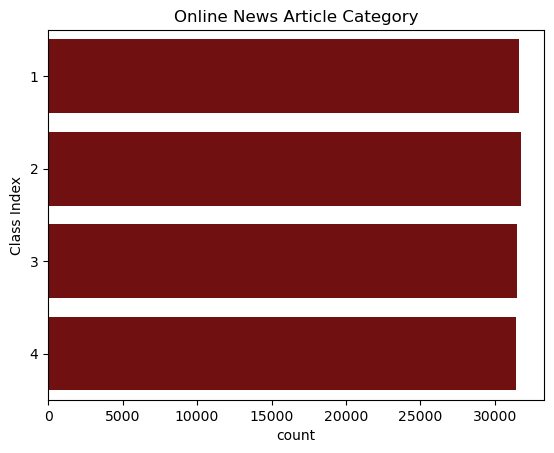

In [37]:
sns.countplot(y ='Class Index', data = Dataset3, color='maroon')
plt.title("Online News Article Category")
plt.show()

* All four categories having equal count of news.
* 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [38]:
Dataset3.to_csv('Dataset3.csv', index=False)
Dataset3.shape

(126291, 2)